In [1]:
#Imporando primeiras libs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Carregando meu dataset 
df = pd.read_excel('churn_data.xlsx')

# Data UnderStanding 
 -Target:

Churn — Cliente deu churn ou não

 -Variáveis numéricas:

Tenure — Número de meses que o cliente está na base

MonthlyCharges — A quantia consumida por cliente mensalmente

TotalCharges — A quantia consumida por cliente total

 - Variáveis categóricas:

CustomerID - Id do cliente

Gender — M/F

SeniorCitizen — Se o cidadão é ou não idoso (0,1)

Partner — Se o cliente é ou não casado

Dependents — Cliente tem dependentes (Yes, No)

PhoneService — Cliente tem serviço telefonico (Yes, No)

MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)

InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)

OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)

OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)

DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)

TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)

StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)

StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)

Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)

PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)

PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

Análise Exploratória 

In [3]:
#Visualizando o dataset 
df.head()
#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Nosso dataset 'Churn' contem:
 - 20 colunas.
 - 7032 linhas.
 - 20 colunas categóricas e 4 colunas numéricas.

In [4]:
#Dropando dados nulos 
df.dropna(inplace=True)

In [5]:
#Deixando todas as colunas com a inical maiscula
df.columns = df.columns.str.title()

In [6]:
#Analisando qual a dimensão dos valores na coluna target
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x257bee2c850>,
 [Text(0, 0, 'não churn'), Text(1, 0, 'churn')])

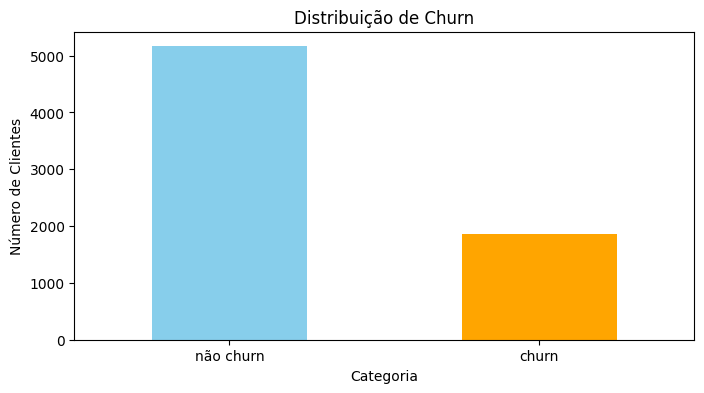

In [7]:
#Criando uma variável de Churn para o gráfico
churn_values = df['Churn'].value_counts()

#Definindo o gráfico
fig = plt.figure(figsize=(8,4)) #tamanho da figura
churn_values.plot(kind = 'bar', color=['skyblue','orange'])

#Configurando titulo e rótulos
plt.title('Distribuição de Churn')
plt.xlabel('Categoria')
plt.ylabel('Número de Clientes')

#Renomeando titulos do eixo x e na horizontal
plt.xticks(ticks=[0,1], labels=['não churn','churn'], rotation=0)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_12340\4118328875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= payment_id, x= 'Paymentmethod', y='Customerid', palette=colors);


Text(0, 0.5, 'Quantidade de clientes')

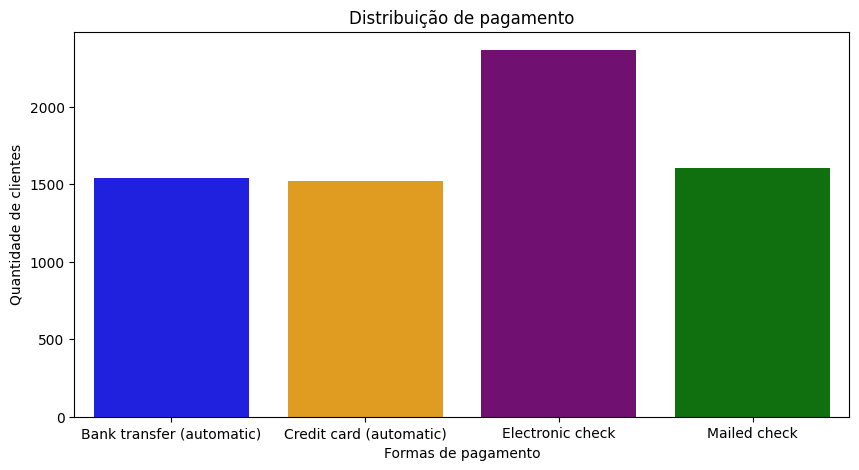

In [8]:
#Criando uma variável de método de pagamento para o gráfico
payment_id = df.groupby("Paymentmethod")['Customerid'].count().reset_index()

#Plotando gráfico 
fig = plt.figure(figsize=(10,5))
colors = ['blue', 'orange', 'purple', 'green'] #definindo paleta de cores das barras
sns.barplot(data= payment_id, x= 'Paymentmethod', y='Customerid', palette=colors);

#Configurando titulo e eixos 
plt.title('Distribuição de pagamento')
plt.xlabel('Formas de pagamento')
plt.ylabel('Quantidade de clientes')


In [9]:
#Analisando a distribuição de genero 
df['Gender'].value_counts()

Gender
Male      3549
Female    3483
Name: count, dtype: int64

Definindo X e Y 

In [10]:
X = df.iloc[:, (df.columns != 'Churn') & (df.columns != 'Customerid')]
y = df[['Churn']]

Transformar minha target em numérica com LabelEncoder 

In [11]:
#Agora vamos transformar as variáveis categóricas em numéricas com o LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

#Aplicando em meu y (Churn)
lb.fit(y.Churn)
y.Churn = lb.transform(y.Churn)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_12340\4068023005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = lb.transform(y.Churn)


Separando minhas categorias do 'X' com GetDummies

In [12]:
X = pd.get_dummies(X)
X

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streamingmovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperlessbilling_No,Paperlessbilling_Yes,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7028,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7029,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,74.40,306.60,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


Normalização de variáveis 

In [13]:
#Importando lib de normalização 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Aplicando eu meu X 
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Treino e Teste 

In [14]:
#Importando lib de treino 
from sklearn.model_selection import train_test_split

#Definindo variáveis de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, stratify= y)

# Regressão Logistica 

In [15]:
#Importando lib de Regressão Logistica 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Treinando o modelo 
rl = model.fit(X_train,y_train)

#Fazendo a predição 
rl.predict(X_test)


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 1, 0, 1])

Unindo minha target e a predição na minha base de teste

In [16]:
#Fazendo o merge com assign 
X_test.assign(Churn = y_test).assign(Label = rl.predict(X_test)) #Churn = dados reais de teste/ Label= predição


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Label
1023,1.0,0.098592,0.819403,0.092384,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2370,1.0,0.985915,0.909950,0.909930,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1150,0.0,0.619718,0.063682,0.129241,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1398,0.0,0.098592,0.477612,0.060887,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
2671,0.0,0.394366,0.020896,0.069069,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.0,0.647887,0.018905,0.118555,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4958,0.0,0.253521,0.316915,0.102891,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2203,1.0,0.000000,0.821393,0.009462,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4907,0.0,0.295775,0.208458,0.095904,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


Matriz de Confusão 

<Figure size 1000x600 with 0 Axes>

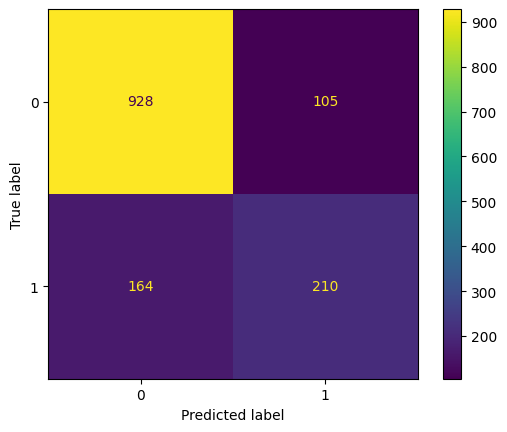

In [17]:
#Importando libs da matriz confusão 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Plotando 
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rl, X_test, y_test)

Métricas 

In [18]:
#Importando libs de métricas 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rl.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rl.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rl.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rl.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rl.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rl.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rl.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rl.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rl.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rl.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rl.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rl.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8033777777777777
Acurácia (Teste): 0.8088130774697939
Acurácia Balanceada (Treino): 0.7210014009571857
Acurácia Balanceada (Teste): 0.7299258170222238
Precision (Treino): 0.6567284448025785


Precision (Teste): 0.6666666666666666
Recall (Treino): 0.5451505016722408
Recall (Teste): 0.5614973262032086
F1-Score (Treino): 0.5957602339181286
F1-Score (Teste): 0.6095791001451378
ROCAUC (Treino): 0.8460269502052848
ROCAUC (Teste): 0.8497885293341133


# Random Forest

In [19]:
#Importando lib do RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#Treinando 
rf.fit(X_train, y_train)

#Fazendo a predição 
rl.predict(X_test)

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([1, 0, 0, ..., 1, 0, 1])

In [20]:
#Adicionando meu Churn real e o predito a minha base de teste (X_test)
X_test.assign(Churn = y_test).assign(Label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Label
1023,1.0,0.098592,0.819403,0.092384,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2370,1.0,0.985915,0.909950,0.909930,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1150,0.0,0.619718,0.063682,0.129241,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1398,0.0,0.098592,0.477612,0.060887,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2671,0.0,0.394366,0.020896,0.069069,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.0,0.647887,0.018905,0.118555,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4958,0.0,0.253521,0.316915,0.102891,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2203,1.0,0.000000,0.821393,0.009462,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4907,0.0,0.295775,0.208458,0.095904,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


Matriz de Confusão

<Figure size 1000x600 with 0 Axes>

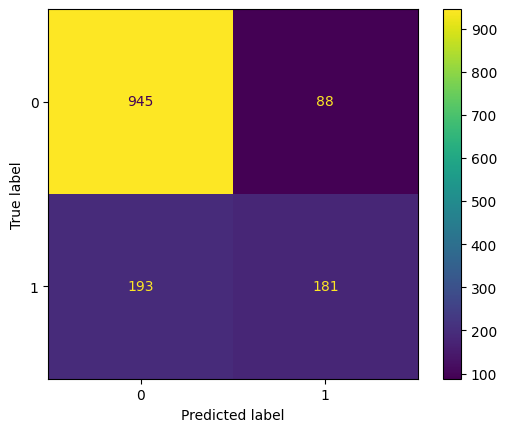

In [21]:
#Importando libs da matriz confusão 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Plotando 
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

Métricas 

In [22]:
#Importando lib de métricas 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9976888888888888
Acurácia (Teste): 0.8002842928216063
Acurácia Balanceada (Treino): 0.9971458534096707
Acurácia Balanceada (Teste): 0.6993842243400924
Precision (Treino): 0.9953208556149733
Precision (Teste): 0.6728624535315985
Recall (Treino): 0.9959866220735786
Recall (Teste): 0.4839572192513369
F1-Score (Treino): 0.9956536275493146
F1-Score (Teste): 0.5629860031104199
ROCAUC (Treino): 0.9998841173564829
ROCAUC (Teste): 0.8294516257616309


 Conclusão de modelo:
 - O modelo RandomForestRegressor se saiu melhor diante do LogisticRegression, conseguindo prever resultados mais precisos de Churn ou Não Churn.
 - Porém podemos ver que existe um 'Overfitting' do modelo em relação a base de teste.
 - A proxima etapa é fazer o tunning com o Grid Search no mesmo para ver se consiguimos melhorar o Overfitting.

# Grid Search

In [23]:
#Importando a lib do GridSearch
from sklearn.model_selection import GridSearchCV

#Definindo parâmetros 
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators' : [100,300,500]

}

grid_search = GridSearchCV(estimator=rf, param_grid= parameters, scoring= 'accuracy', cv= 5, n_jobs= -1)

Treinando o GridSearch

In [24]:
#Após definir nosso GridSearch vamos treinar o mesmo
grid_search.fit(X_train, y_train)
grid_search

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [25]:
best_params = grid_search.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Aplicando o GridSearch no RandomForest

In [26]:
#Importando lin RandomForest
from sklearn.ensemble import RandomForestClassifier

#Tunning no modelo 
rf_tunned = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 9,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 monotonic_cst = None,
 n_estimators = 300,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)


Treinando novamente com o modelo tunado 

In [27]:
#Treinando o modelo RandomForest tunado 
rf_tunned.fit(X_train, y_train)

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, n_estimators=300)

In [28]:
#Fazendo a predição 
rf_tunned.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [29]:
#Usando o assign para juntar a predição a minha base 
X_test.assign(Churn = y_test).assign(Label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Label
1023,1.0,0.098592,0.819403,0.092384,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2370,1.0,0.985915,0.909950,0.909930,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1150,0.0,0.619718,0.063682,0.129241,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1398,0.0,0.098592,0.477612,0.060887,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2671,0.0,0.394366,0.020896,0.069069,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.0,0.647887,0.018905,0.118555,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4958,0.0,0.253521,0.316915,0.102891,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
2203,1.0,0.000000,0.821393,0.009462,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4907,0.0,0.295775,0.208458,0.095904,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


Métricas no modelo tunado 

In [30]:
#Importando lib de métricas 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8519111111111111
Acurácia (Teste): 0.8123667377398721
Acurácia Balanceada (Treino): 0.7792314170722424
Acurácia Balanceada (Teste): 0.7229643683575693
Precision (Treino): 0.7749169435215947
Precision (Teste): 0.6909722222222222
Recall (Treino): 0.6240802675585284
Recall (Teste): 0.5320855614973262
F1-Score (Treino): 0.6913671730270471
F1-Score (Teste): 0.6012084592145015
ROCAUC (Treino): 0.9291728683991027
ROCAUC (Teste): 0.8500279545066288


Conclusão: 
- Podemos ver que com o tunning de hiperparametros do modelo conseguimos reduzir bastante a questão do Overfitting. 
- Com isso o modelo a ser usado ficou o RandomForestRegressor com os hiperparametros otimizados.